# Investigating Medical Appointment No Shows dataset

<b>The questions:</b>
<ol>
    <li> Does the difference in time between scheduling the appointment and its actual date affect people not showing for it?
    </li>
    <li>How is the age distributions skewed for show or no show appointments?</li>
    <li>Does prior medical conditions affect people showing up rate?</li>
    <li>Does confirmations like SMS affect people showing up rate?</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Doing basic operations

## importing data and taking a look at statistics.

Importing the data.

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Looking at the size of the dataframe.

In [3]:
data.shape

(110527, 14)

Dropping columns that might not be useful in our analysis. As they are computer generated keys in case of 

In [4]:
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

Changing the appointments' scheduling times and the times of appointments to the difference between them.

In [5]:
data['timeDiff'] =  pd.to_datetime(data['AppointmentDay']) - pd.to_datetime(data['ScheduledDay'])
data['timeDiff'] = data['timeDiff'].apply(lambda x: x.days)


Looking at the basic statistics of the data.

In [6]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,timeDiff
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


<b>Obesrvations:</b>

<ol>
    <li>There are ages which have the value "-1" and they most likely mean that the data at these instances are missing.</li>
    <li>there are negative time differences which are most likely because the one who types the dates swapped them.</li>
    <li>There is someone who made an appointment and his/her age was 115, which is cool.</li>
</ol>

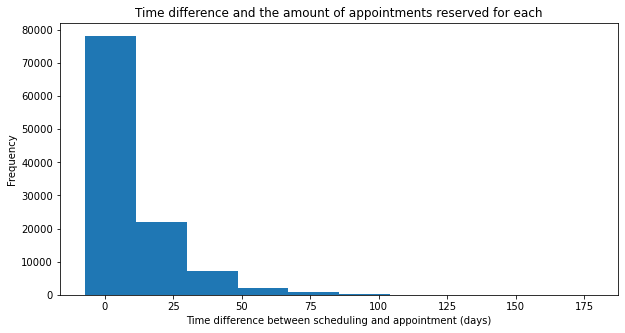

In [7]:
plt.hist(data['timeDiff'])
plt.xlabel('Time difference between scheduling and appointment (days)')
plt.ylabel('Frequency')
plt.title("Time difference and the amount of appointments reserved for each")
plt.show()

The time difference between scheduling an appointment and the actual date has high frequency around low numbers(e.g. 2, 3 days are more common than 25)

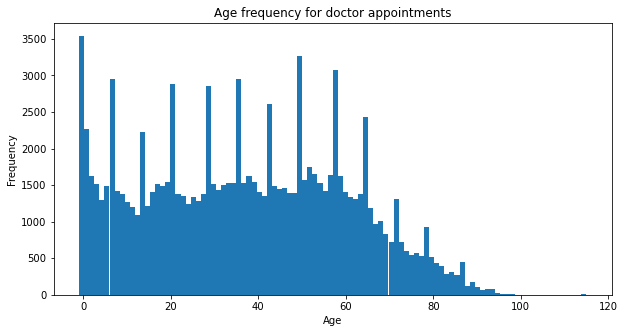

In [8]:
plt.hist(data['Age'], 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency for doctor appointments')
plt.show()

Age nearly has a uniform distribution till we reach 60. This might hint that people of all ages get sick with rates similar, maybe different diseases but on the bigger scale it is similar.

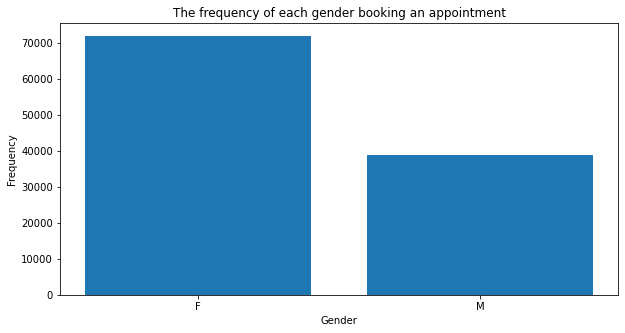

In [9]:
plt.bar(data['Gender'].unique(), [sum(data['Gender'] == x) for x in data['Gender'].unique()])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('The frequency of each gender booking an appointment')
plt.show()

The frequency of females visiting doctors is higher than that of males.

In [10]:
relative = sum(data['Gender'] == 'F') / sum(data['Gender'] == 'M')
relative

1.8569545325303074

<function matplotlib.pyplot.show(close=None, block=None)>

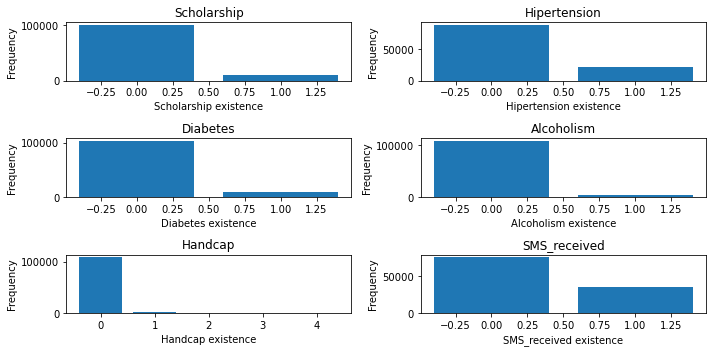

In [11]:
figure, axes = plt.subplots(nrows=3, ncols=2)

ind = 4
for i in range(3):
    for j in range(2):
        curr = data.iloc[:, ind]
        axes[i, j].bar(curr.unique(), [sum(curr == x) for x in curr.unique()]) 
        axes[i, j].set_title(data.keys()[ind])
        label = data.keys()[ind] + ' existence'
        axes[i, j].set_xlabel(label)
        axes[i, j].set_ylabel('Frequency')
        ind += 1


plt.tight_layout()
plt.show

All of these plots show that the majority of appointments are done by people who do not suffer from chronic illnesses.

<b>Obesrvations:</b>

<ol>
    <li>Time difference: around 50% of the people schedule their appointments in less than 3 days in advance.</li>
    <li>Age: The histogram approximately follows normal distribution till we reach 60 then it starts decreasing.</li>
    <li>Gender: The proportion of females to males that make appointment is around 2 which shows that females make appointments in this case twice as men</li>
    <li>other features: in most cases the people who had a medical condition is much less than people with no prior medical conditions overall</li>
</ol>

#### changing the target column to 1,0 in order to use it later

In [12]:
data['No-show'] = data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,timeDiff
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0,-1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0,-1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0,-1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0,-1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0,-1


Now we will perform some data analysis on people who showed for the appointment vs who did not. We can use group by to perform these operations but it is just easier to split it according to "No-show".

# People who did not show up for the appointment

Making a separate dataset for the people who did not show up.

In [14]:
dataNot = data[data['No-show'] == 1]

In [15]:
dataNot['No-show'].unique()

array([1], dtype=int64)

In [16]:
dataNot.shape

(22319, 12)

Getting the basic statistics.

In [17]:
dataNot.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,timeDiff
count,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.000000,22319.0,22319.000000
mean,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,1.0,14.831489
std,21.965941,0.319640,0.374764,0.244885,0.171505,0.156670,0.496198,0.0,16.605912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-7.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,22.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.0,178.000000


<b>Obesrvations:</b>

<ol>
    <li>the 50th percentile for time difference is much more than the original and the people who show up.</li>
</ol>

Plotting a histogram for the frequency of time difference.

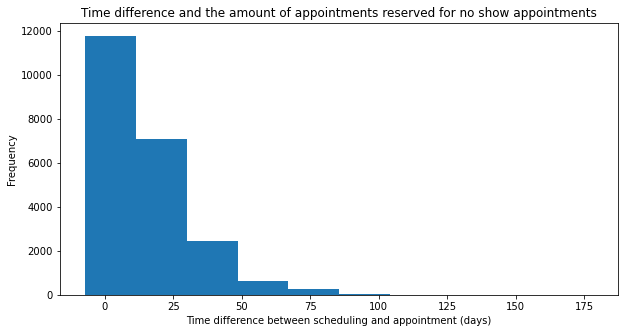

In [18]:
plt.hist(dataNot['timeDiff'])
plt.xlabel('Time difference between scheduling and appointment (days)')
plt.ylabel('Frequency')
plt.title("Time difference and the amount of appointments reserved for no show appointments")
plt.show()

The time difference in this case is more sparse than the show appointments, meaning that more appointments that are scheduled early on become no show

A bar plot to see the ratio of women to men.

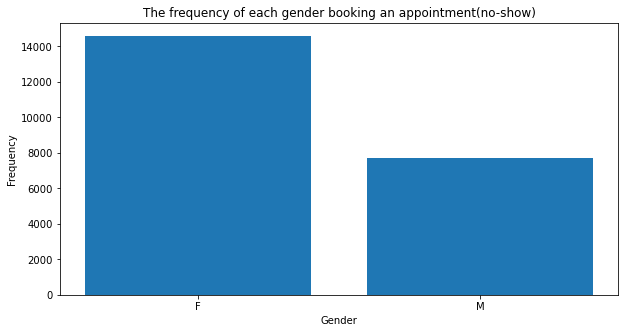

In [19]:
plt.bar(dataNot['Gender'].unique(), [sum(dataNot['Gender'] == x) for x in dataNot['Gender'].unique()])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('The frequency of each gender booking an appointment(no-show)')
plt.show()

The frequency of females visiting doctors is higher than that of males.

In [20]:
relative = sum(dataNot['Gender'] == 'F') / sum(dataNot['Gender'] == 'M')
relative

1.8891909385113268

Plotting bar charts for other features.

In [21]:
percent1 = {}

<function matplotlib.pyplot.show(close=None, block=None)>

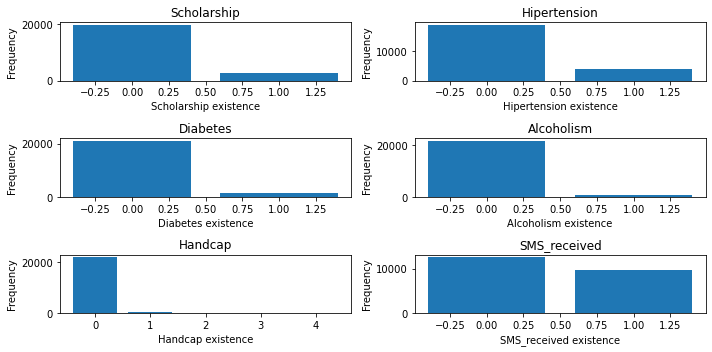

In [22]:
figure, axes = plt.subplots(nrows=3, ncols=2)

ind = 4
for i in range(3):
    for j in range(2):
        curr = dataNot.iloc[:, ind]
        axes[i, j].bar(curr.unique(), [sum(curr == x) for x in curr.unique()]) 
        percent1[data.keys()[ind]] = sum(curr == 1) / dataNot.shape[0]
        axes[i, j].set_title(data.keys()[ind])
        label = data.keys()[ind] + ' existence'
        axes[i, j].set_xlabel(label)
        axes[i, j].set_ylabel('Frequency')
        ind += 1


plt.tight_layout()
plt.show

All of these plots show that the majority of appointments are done by people who do not suffer from chronic illnesses.

The percentage of people who had a medical condition or scholarship in this subset.

In [23]:
for i, j in percent1.items():
    print("When it comes to", i, "around", round(j*100), "%", "of the people who did not show up to the appointment had it.")

When it comes to Scholarship around 12 % of the people who did not show up to the appointment had it.
When it comes to Hipertension around 17 % of the people who did not show up to the appointment had it.
When it comes to Diabetes around 6 % of the people who did not show up to the appointment had it.
When it comes to Alcoholism around 3 % of the people who did not show up to the appointment had it.
When it comes to Handcap around 2 % of the people who did not show up to the appointment had it.
When it comes to SMS_received around 44 % of the people who did not show up to the appointment had it.


Histogram for ages of this subset.

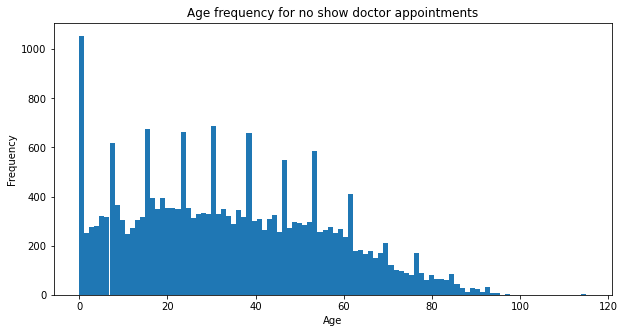

In [24]:
plt.hist(dataNot['Age'], 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency for no show doctor appointments')
plt.show()

Age nearly has a uniform distribution till we reach 60. This might hint that people of all ages get sick with rates similar, maybe different diseases but on the bigger scale it is similar.

# People who did show up for the appointment

Making a separate dataset for the people who did show up.

In [25]:
dataShowed = data[data['No-show'] == 0]

In [26]:
dataNot['No-show'].unique()

array([1], dtype=int64)

In [27]:
dataShowed.shape

(88208, 12)

Getting the basic statistics.

In [28]:
dataShowed.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,timeDiff
count,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.000000,88208.0,88208.000000
mean,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,0.0,7.754659
std,23.338878,0.291695,0.403259,0.261507,0.171732,0.162750,0.454380,0.0,14.550398
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,11.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.0,178.000000


Plotting a histogram for the frequency of time difference.

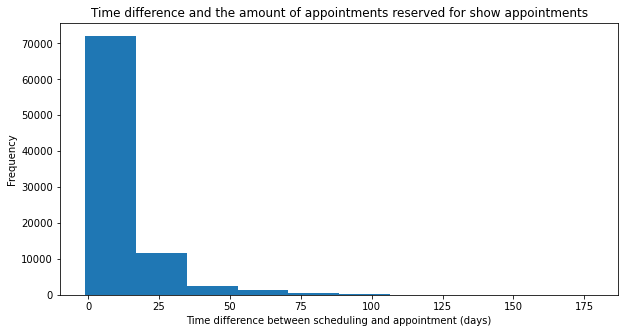

In [29]:
plt.hist(dataShowed['timeDiff'])
plt.xlabel('Time difference between scheduling and appointment (days)')
plt.ylabel('Frequency')
plt.title("Time difference and the amount of appointments reserved for show appointments")
plt.show()

The time difference here is very clustered around the small time differnce, meaning that many people who actually show up for for the appointments have scheduled the meeting close to the actual time.

A bar plot to see the ratio of women to men.

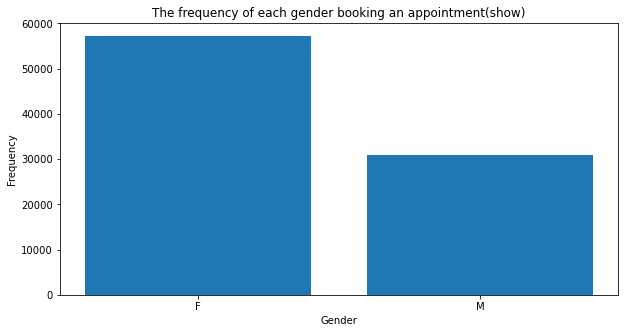

In [30]:
plt.bar(dataShowed['Gender'].unique(), [sum(dataShowed['Gender'] == x) for x in dataShowed['Gender'].unique()])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('The frequency of each gender booking an appointment(show)')
plt.show()

The frequency of females visiting doctors is higher than that of males.

In [31]:
relative = sum(dataShowed['Gender'] == 'F') / sum(dataShowed['Gender'] == 'M')
relative

1.8489115690200892

Plotting bar charts for other features.

In [32]:
percent = {}

<function matplotlib.pyplot.show(close=None, block=None)>

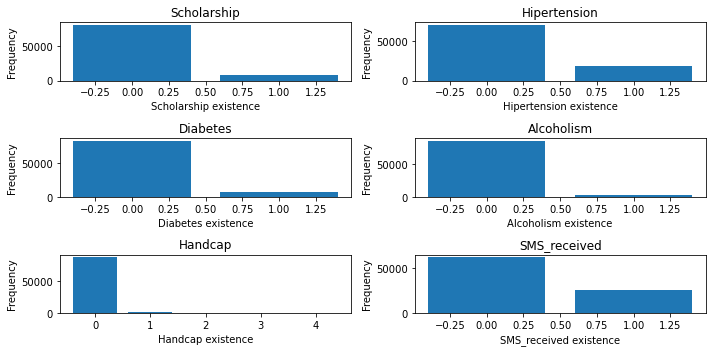

In [33]:
figure, axes = plt.subplots(nrows=3, ncols=2)

ind = 4
for i in range(3):
    for j in range(2):
        curr = dataShowed.iloc[:, ind]
        axes[i, j].bar(curr.unique(), [sum(curr == x) for x in curr.unique()]) 
        percent[data.keys()[ind]] = sum(curr == 1) / dataShowed.shape[0]
        axes[i, j].set_title(data.keys()[ind])
        label = data.keys()[ind] + ' existence'
        axes[i, j].set_xlabel(label)
        axes[i, j].set_ylabel('Frequency')
        ind += 1


plt.tight_layout()
plt.show

All of these plots show that the majority of appointments are done by people who do not suffer from chronic illnesses.

The percentage of people who had a medical condition or scholarship in this subset.

In [34]:
for i, j in percent.items():
    print("When it comes to", i, "around", round(j*100), "%", "of the people who showed up to the appointment had it.")

When it comes to Scholarship around 9 % of the people who showed up to the appointment had it.
When it comes to Hipertension around 20 % of the people who showed up to the appointment had it.
When it comes to Diabetes around 7 % of the people who showed up to the appointment had it.
When it comes to Alcoholism around 3 % of the people who showed up to the appointment had it.
When it comes to Handcap around 2 % of the people who showed up to the appointment had it.
When it comes to SMS_received around 29 % of the people who showed up to the appointment had it.


Histogram for ages of this subset.

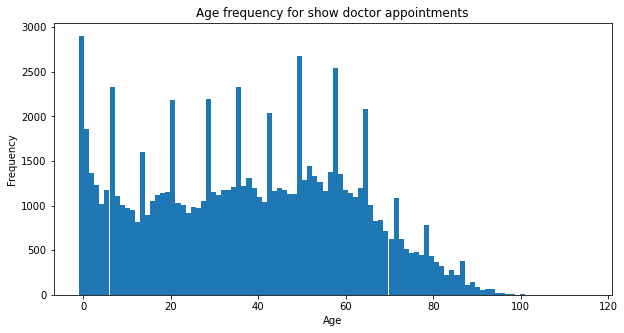

In [35]:
plt.hist(dataShowed['Age'], 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency for show doctor appointments')
plt.show()

Age nearly has a uniform distribution till we reach 60. This might hint that people of all ages get sick with rates similar, maybe different diseases but on the bigger scale it is similar.

## Observations for the differences between the two

<b>Obesrvations:</b>

<ol>
    <li>People who do not show up for the appointments tend to schedule it earlier</li>
    <li>The mean age for people who did not show up is less than the mean of people who showed up.</li>
    <li>People with medical conditions tend to show up for appointments more. This might be linked to the age metric.</li>
    <li>Counterintuitively, the percentage of people who showed up and got the message is less than the percentage of people who did not show up and got the message. However, this metric might not be clear according to things like: when the message was received, did the person see it and others.</li>
</ol>

<b>Limitations:</b>

<ol>
    <li>More data analysis could have been done using the neighbourhood feature but they were not relevant to the questions being asked.</li>
    <li>Outliers, negative ages for example, affected the analysis. When describing the data this affected the mean and quantiles. It also affected the graphs.</li>
    <li>Knowing the types of doctors that people cancelled would have given us more insights like the likelihood of the case being serious and so on.</li>
</ol>